# Price - Optimization - Retail Analytics

# Importing Libraries

In [41]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline

# Load the Data

In [42]:
df=pd.read_csv('D:/python learning/beef.csv')

In [43]:
df.head()

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


In [46]:
df['Revenue']=df['Quantity']*df['Price']

In [47]:
df

,Year,Quarter,Quantity,Price,Revenue
0,1977,1,22.9976,142.1667,3269.492900
1,1977,2,22.6131,143.9333,3254.778106
2,1977,3,23.4054,146.5000,3428.891100
3,1977,4,22.7401,150.8000,3429.207080
4,1978,1,22.0441,160.0000,3527.056000
...,...,...,...,...,...
86,1998,3,17.5085,277.3667,4856.274867
87,1998,4,16.6475,279.5333,4653.530612
88,1999,1,16.6785,278.0000,4636.623000
89,1999,2,17.7635,284.7667,5058.453275


In [48]:
df.groupby('Quarter')['Revenue'].sum()

Quarter
1    101674.429791
2    105884.555198
3    107917.302004
4     98202.583351
Name: Revenue, dtype: float64

D:\phone\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

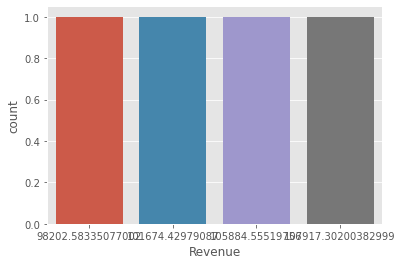

In [49]:

sns.countplot(df.groupby('Quarter')['Revenue'].sum(),data=df)                        

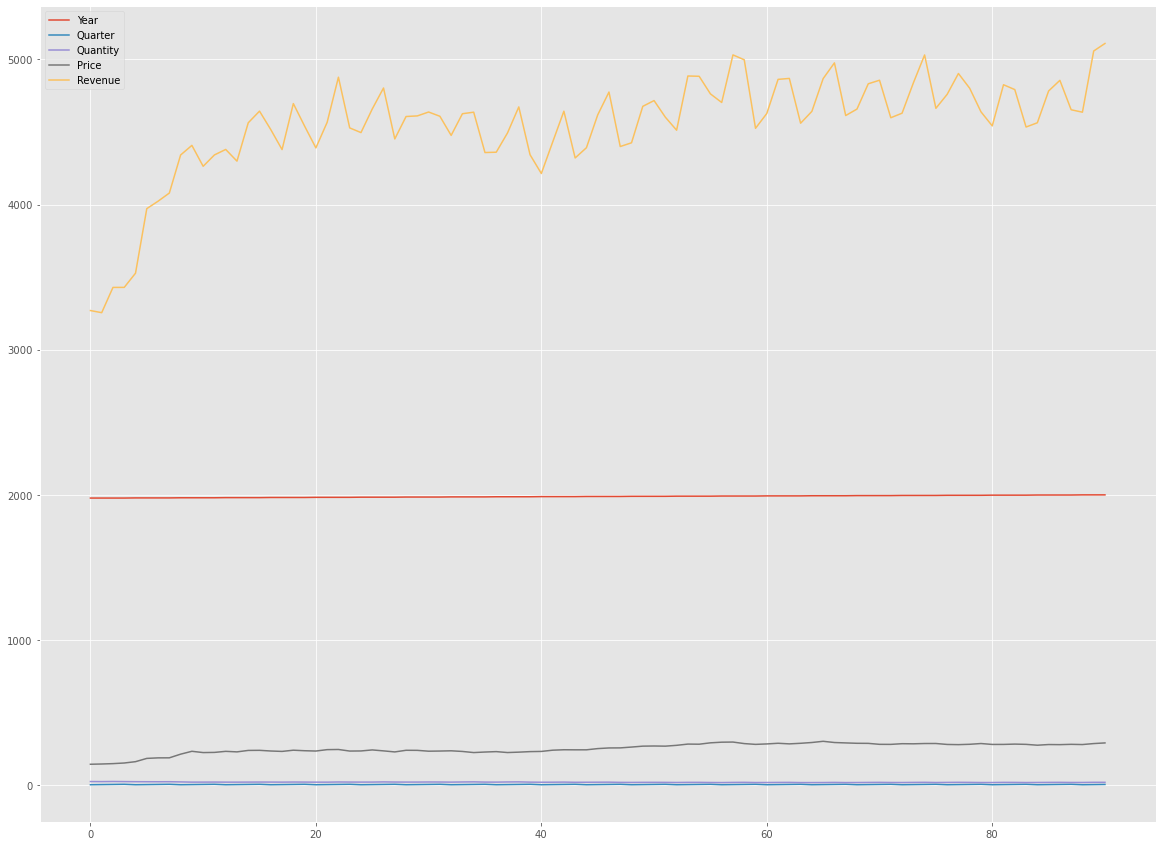

In [39]:
plt.rcParams['figure.figsize']=(20,15)
plt.style.use('ggplot')
ax=df.plot()
plt.show()

# Defining the profit function

In [7]:

# revenue =Qantity * Price
# profit=revenue -cost

df['Revenue']=df['Quantity']*df['Price']

In [8]:
df

,Year,Quarter,Quantity,Price,Revenue
0,1977,1,22.9976,142.1667,3269.492900
1,1977,2,22.6131,143.9333,3254.778106
2,1977,3,23.4054,146.5000,3428.891100
3,1977,4,22.7401,150.8000,3429.207080
4,1978,1,22.0441,160.0000,3527.056000
...,...,...,...,...,...
86,1998,3,17.5085,277.3667,4856.274867
87,1998,4,16.6475,279.5333,4653.530612
88,1999,1,16.6785,278.0000,4636.623000
89,1999,2,17.7635,284.7667,5058.453275


D:\phone\anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


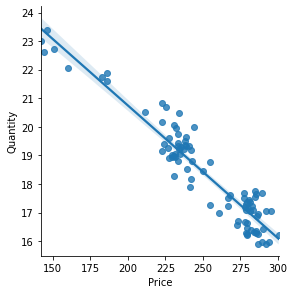

In [12]:
#Defining the demand Function

sns.lmplot(x="Price",y="Quantity",data=df,size=4)

# We will find the demand curve now

In [13]:
model=ols("Quantity ~ Price",data=df).fit()

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.69e-46
Time:                        12:18:46   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

# We will find the demand curve now

In [ ]:
Quantity= 30.05-0.0465*Price

In [18]:
Profit = (30.05-0.0465*Price)*Price -cost

#### The next step is to find the price we are looking for from a range of options. The codes below should be intuitive, but basically what we are doing here is calculating revenue for each price and the corresponding quantity sold.

In [20]:
Price=[320,330,340,350,360,370,380,390]

In [21]:
#Assume a fixed cost for now 
cost=80


In [26]:
Revenue=[]
for i in Price:
    Quantity_demand=30.05-0.0465*i
    
    Revenue.append((i-cost) * Quantity_demand )
Profit=pd.DataFrame({"Price":Price,"Revenue":Revenue})

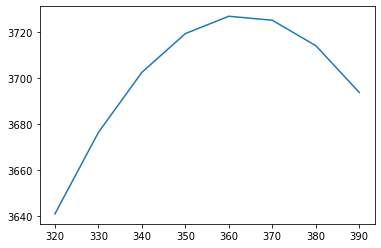

In [27]:
plt.plot(Profit["Price"],Profit["Revenue"])



### If price and revenue are plotted, we can visually identify the peak of the revenue and find the price that makes the revenue at the highest point on the curve.

####  So we find that the maximum revenue at different price levels is reached at $3,726 when the price is set at $360.

In [30]:
#price at which revenue is maximum
Profit[Profit['Revenue'] == Profit['Revenue'].max()]

,Price,Revenue
4,360,3726.8
